##My client is an owner of Big Tech Company and he wants to take all company employees to international trip because of compamies big profit in terms of revenue, as a data analyst he want's me to do some analysis and give some estimate of different countries hotels and their prices so that i can give him a clear view on how much he have to spend on the expenses related to hotels, i extracted the data from famous airbnb platform from different sources and i will be performing EDA .


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly
import matplotlib.pyplot as plt
import geopandas as gpd

In [5]:
#Importing data
df = pd.read_csv(r"C:\Users\Mohammed\airbnb.csv")
df


,Unnamed: 0,id,name,rating,reviews,host_name,host_id,address,features,amenities,...,price,country,bathrooms,beds,guests,toiles,bedrooms,studios,checkin,checkout
0,0,49849504,Perla bungalov,4.71,64,Mehmetcan,357334205.0,"Kartepe, Kocaeli, Turkey","2 guests,2 bedrooms,1 bed,1 bathroom","Mountain view,Valley view,Lake access,Kitchen,...",...,8078,Turkey,1,1,2,0,2,0,Flexible,12 00 pm
1,1,50891766,Authentic Beach Architect Sheltered Villa with...,New,0,Fatih,386223873.0,"Kaş, Antalya, Turkey","4 guests,2 bedrooms,2 beds,2 bathrooms","Kitchen,Wifi,Dedicated workspace,Free parking ...",...,4665,Turkey,2,2,4,0,2,0,4 00 pm - 11 00 pm,10 00 am
2,2,50699164,cottages sataplia,4.85,68,Giorgi,409690853.0,"Imereti, Georgia","4 guests,1 bedroom,3 beds,1 bathroom","Mountain view,Kitchen,Wifi,Dedicated workspace...",...,5991,Georgia,1,3,4,0,1,0,After 1 00 pm,12 00 pm
3,3,49871422,Sapanca Breathable Bungalow,5.0,13,Melih,401873242.0,"Sapanca, Sakarya, Turkey","4 guests,1 bedroom,2 beds,1 bathroom","Mountain view,Valley view,Kitchen,Wifi,Free pa...",...,11339,Turkey,1,2,4,0,1,0,After 2 00 pm,12 00 pm
4,4,51245886,Bungalov Ev 2,New,0,Arp Sapanca,414884116.0,"Sapanca, Sakarya, Turkey","2 guests,1 bedroom,1 bed,1 bathroom","Kitchen,Wifi,Free parking on premises,TV,Air c...",...,6673,Turkey,1,1,2,0,1,0,After 2 00 pm,12 00 pm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12800,12800,44697740,"Brown Dome House No. 3, full of healing",4.94,16,Aidan,161552316.0,"Imhoe-myeon, Jindo, South Jeolla Province, Sou...","4 guests,8 bathrooms","Kitchen,Wifi,Free parking on premises,Private ...",...,4288,South Korea,8,0,4,0,0,0,3 00 pm - 11 00 pm,11 00 am
12801,12801,29975283,Bubble Hotel Ubud with Bathtub under the Sky,4.67,6,Martha,118954227.0,"Gianyar, Indonesia","2 guests,1 bedroom,1 bed,Toilet with sink","Wifi,Free on-street parking,Air conditioning,G...",...,15200,Indonesia,0,1,2,1,1,0,3 00 pm - 10 00 pm,12 00 pm
12802,12802,32977697,Paradise Eco Hub,4.67,3,Silas,175214568.0,"Kabale, Uganda","2 guests,1 bedroom,2 beds,1 private bathroom","Wifi,Breakfast,Long-term stays allowed,Unavail...",...,9103,Uganda,1,2,2,0,1,0,After 3 00 pm,NaN
12803,12803,8006146,WisDOME - Mentigi Bay Village - Gilis - Lombok,4.86,7,Cempaka,718423.0,"Gunung Sari, Nusa Tenggara Barat, Indonesia","8 guests,2 bedrooms,4 beds,2.5 bathrooms","Kitchen,Wifi,Dedicated workspace,Free parking ...",...,42262,Indonesia,2,4,8,0,2,0,Flexible,12 00 pm


In [26]:
#Cleaninf the data since column 0 is no longer needed i will remove it
df.drop(columns=["Unnamed: 0"], inplace=True)

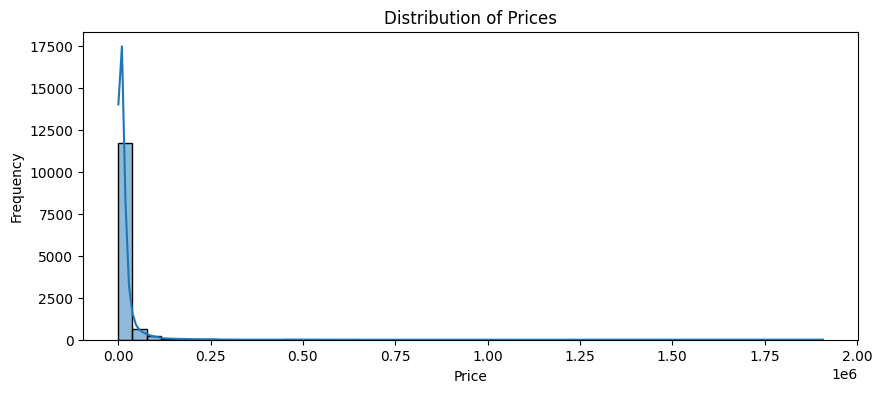

In [30]:
#Visualizing price distribution
plt.figure(figsize=(10, 4))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [8]:
df.isna().count()

Unnamed: 0      12805
id              12805
name            12805
rating          12805
reviews         12805
host_name       12805
host_id         12805
address         12805
features        12805
amenities       12805
safety_rules    12805
hourse_rules    12805
img_links       12805
price           12805
country         12805
bathrooms       12805
beds            12805
guests          12805
toiles          12805
bedrooms        12805
studios         12805
checkin         12805
checkout        12805
dtype: int64

In [8]:
df.describe()

,Unnamed: 0,id,host_id,price,bathrooms,beds,guests,toiles,bedrooms,studios
count,12805.000000,1.280500e+04,1.280500e+04,1.280500e+04,12805.000000,12805.000000,12805.000000,12805.000000,12805.000000,12805.000000
mean,6402.000000,7.525187e+16,1.638192e+08,1.769780e+04,1.874424,3.316751,5.213745,0.019211,2.136041,0.023585
std,3696.629433,2.007933e+17,1.413622e+08,4.569364e+04,2.091399,4.037791,3.808830,0.137272,2.359005,0.151757
min,0.000000,1.313100e+04,2.303900e+04,3.930000e+02,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,3201.000000,2.023958e+07,3.700032e+07,3.994000e+03,1.000000,1.000000,2.000000,0.000000,1.000000,0.000000
50%,6402.000000,3.682229e+07,1.256459e+08,8.175000e+03,1.000000,2.000000,4.000000,0.000000,1.000000,0.000000
75%,9603.000000,4.999760e+07,2.639623e+08,1.606200e+04,2.000000,4.000000,6.000000,0.000000,3.000000,0.000000
max,12804.000000,7.017905e+17,4.758973e+08,1.907963e+06,50.000000,98.000000,16.000000,1.000000,50.000000,1.000000


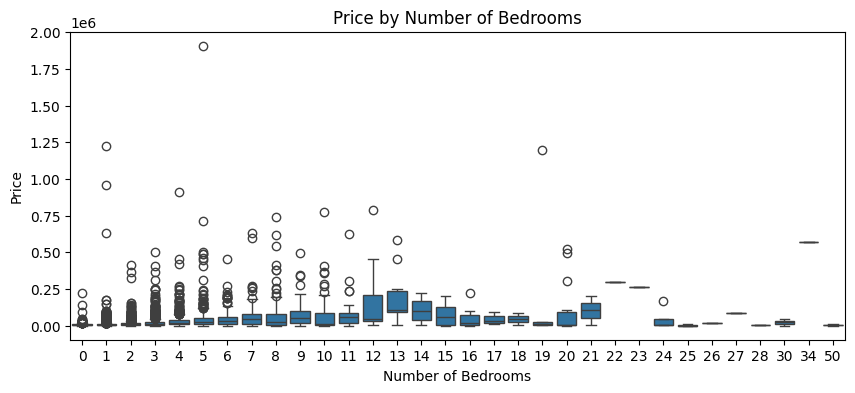

In [32]:
# Price by Number of Bedrooms
plt.figure(figsize=(10, 4))
sns.boxplot(x='bedrooms', y='price', data=df)
plt.title('Price by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.show()

In [33]:
#calculation of average price by country
avg_price_by_country = df.groupby('country')['price'].mean().reset_index()


In [34]:
avg_price_by_country

,country,price
0,Albania,4749.750000
1,Argentina,10647.000000
2,Armenia,6591.166667
3,Australia,26735.000000
4,Austria,20849.555556
...,...,...
143,Sri Lanka,5507.750000
144,Taiwan,15541.000000
145,Thailand,11293.833333
146,Turkey,7791.333333


In [35]:
#Sorting by average price
avg_price_by_country = avg_price_by_country.sort_values(by='price')


In [36]:
avg_price_by_country

,country,price
89,Senegal,1289.000000
130,Jordan,1812.000000
122,Georgia,1906.333333
120,Cuba,2276.500000
10,Bolivia,2462.000000
...,...,...
85,Qatar,112717.500000
6,Bahamas,116397.500000
110,United Arab Emirates,119633.653846
39,Honduras,140998.500000


In [38]:
#selecting the countries lowest average price
lowest_avg_price_countries = avg_price_by_country.head(10)
lowest_avg_price_countries

,country,price
89,Senegal,1289.000000
130,Jordan,1812.000000
122,Georgia,1906.333333
120,Cuba,2276.500000
10,Bolivia,2462.000000
71,Nepal,2494.631579
135,Morocco,2498.500000
23,Cuba,2638.158103
87,Rwanda,2776.500000
138,Philippines,2979.000000


C:\Users\Mohammed\AppData\Local\Temp\ipykernel_18444\2858889494.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='price', y='country', data=lowest_avg_price_countries, palette='viridis')


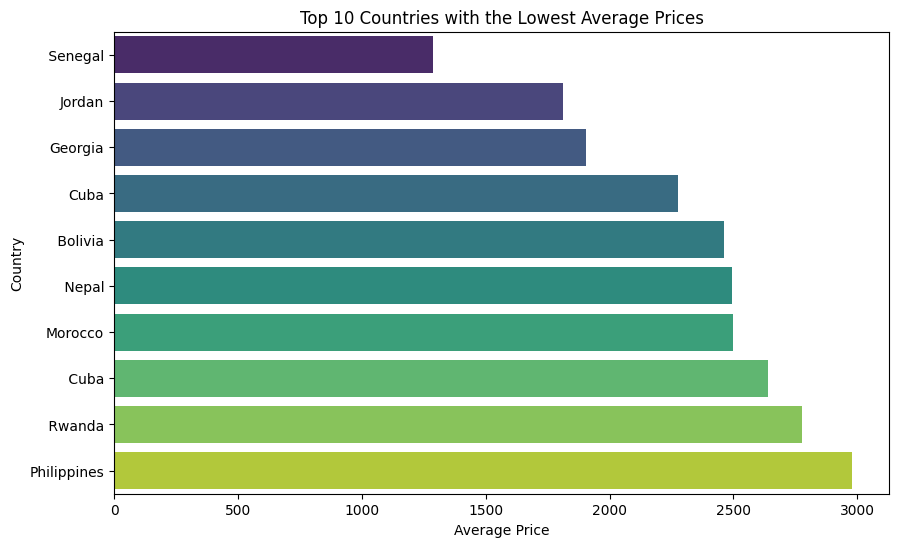

In [40]:
#Plotting countries in a bar chart by lowest average price
plt.figure(figsize=(10, 6))
sns.barplot(x='price', y='country', data=lowest_avg_price_countries, palette='viridis')
plt.title('Top 10 Countries with the Lowest Average Prices')
plt.xlabel('Average Price')
plt.ylabel('Country')
plt.show()

C:\Users\Mohammed\AppData\Local\Temp\ipykernel_18444\2073529969.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='price', y='country', data=lowest_avg_price_countries, palette='viridis')


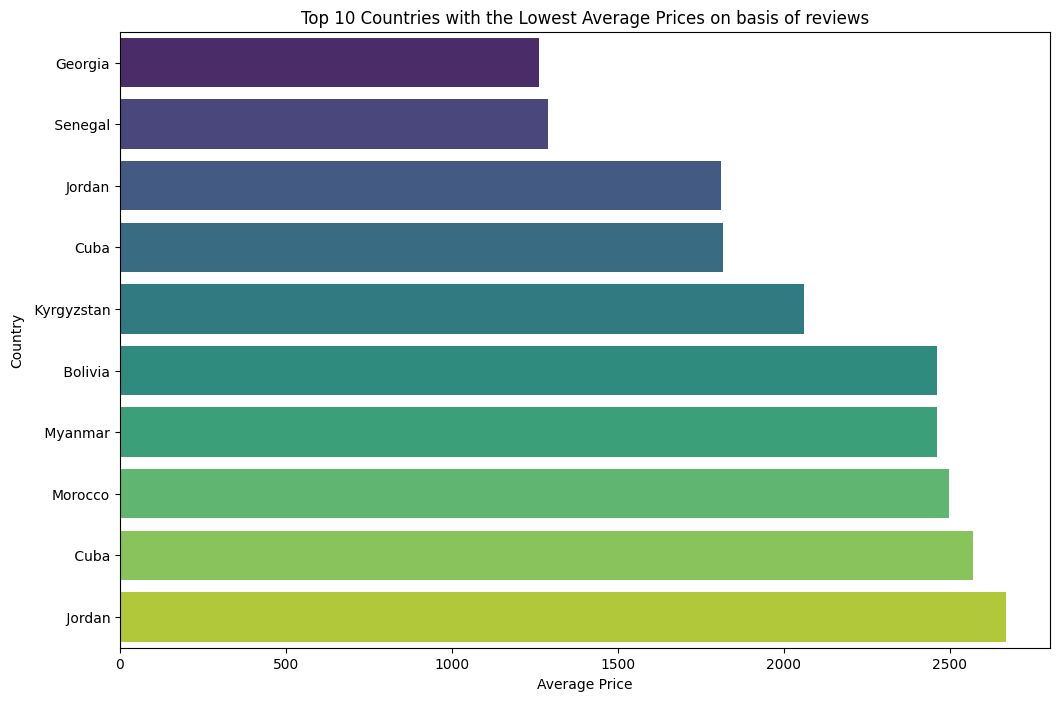

In [44]:
#Rating ananlysis
#since there are non numeric values in review column we have to transfoem it
# Handling missing values (example: drop rows where 'price' or 'country' is missing)
df = df.dropna(subset=['price', 'country'])
# Converting the 'price' and 'rating' columns to numeric, coercing errors to NaN
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
# Droping rows with NaN values in 'price' or 'rating' columns
df = df.dropna(subset=['price', 'rating'])
# Grouping by country and calculate average price
avg_price_by_country = df.groupby('country')['price'].mean().reset_index()
# Sorting by average price
avg_price_by_country = avg_price_by_country.sort_values(by='price')
#Selecting the countries with the lowest average prices (e.g., top 10)
lowest_avg_price_countries = avg_price_by_country.head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x='price', y='country', data=lowest_avg_price_countries, palette='viridis')
plt.title('Top 10 Countries with the Lowest Average Prices on basis of reviews')
plt.xlabel('Average Price')
plt.ylabel('Country')
plt.show()

C:\Users\Mohammed\AppData\Local\Temp\ipykernel_18444\843778891.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='reviews', y='country', data=review_volume_lowest_price_countries, palette='viridis')


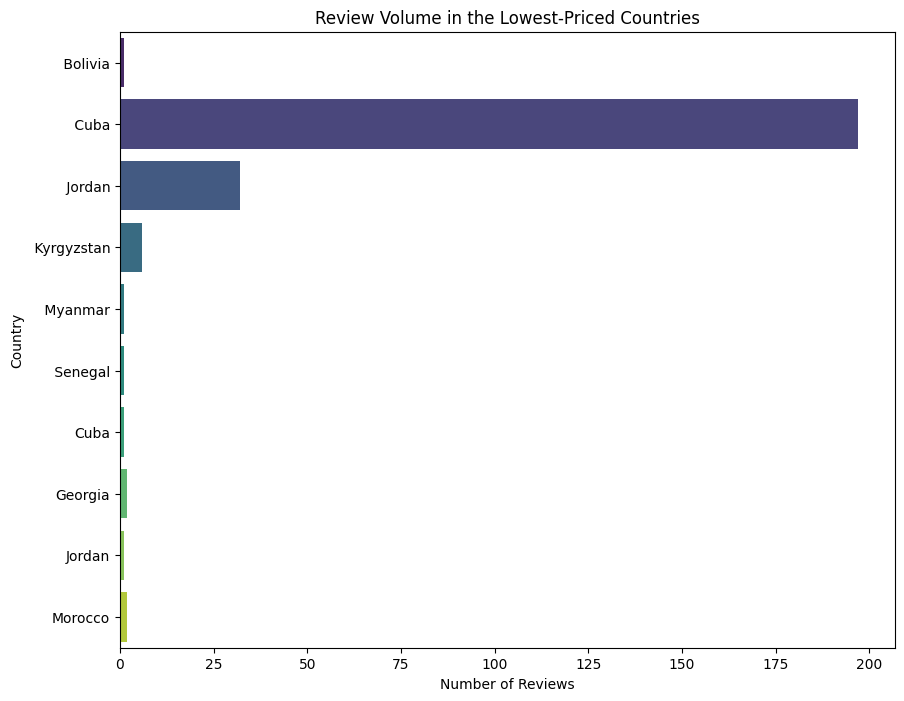

In [48]:
review_volume_by_country = df.groupby('country')['reviews'].count().reset_index()

# Filter to include only the lowest-priced countries
review_volume_lowest_price_countries = review_volume_by_country[review_volume_by_country['country'].isin(lowest_avg_price_countries['country'])]

# Plot the bar graph
plt.figure(figsize=(10, 8))
sns.barplot(x='reviews', y='country', data=review_volume_lowest_price_countries, palette='viridis')
plt.title('Review Volume in the Lowest-Priced Countries')
plt.xlabel('Number of Reviews')
plt.ylabel('Country')
plt.show()


In [ ]:
##Hence as per the analysis we can recommend client to plan a vist for cuba since it is best if he is planning for a reasonable cost.